# Presentation of the Data Generator

This notebook presents the tools available to generate data.

In [14]:
import os
import sys
sys.path.append("..") # Adds higher directory to python modules path.
import numpy as np
from structuredgraph import StructuredGraph
from structural_equation import lin_hidden_max_obs_generator
import matplotlib.pyplot as plt

In [15]:
print("Working in:", os.getcwd())

Working in: /Users/paul/PycharmProjects/causal_gene_embedding/Notebooks


## Introduction

The data is generated according to a set of equations called structural equations. Those structural equations involve variables which can be either hidden or observable. 

We use a class StructuredGraph to represent the data generating process. This class contains a directed acyclic networkx graph. In our experiments, the observed nodes are assumed to have to children.

Each node of the graph corresponds to a variable. The value of the variable is stored as an attribute of the node.

For example, we can generate a graph with 5 hidden nodes (top circle) and 4 observed nodes (bottom raw). Values are initially set to zero.

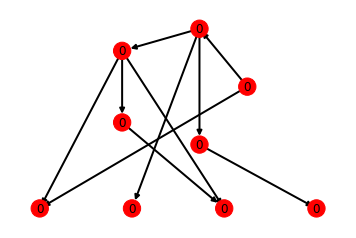

In [16]:
np.random.seed(4)
G = StructuredGraph(n_hidden=5, n_observations=4)
G.draw(show_values=True)

The value of a node are generated from a structural equation that takes as input the values of the parents and outputs the value of the node. This structural equation is also stored as an attribute of the node.

One can define a structural equation generator and pass it as an argument when initializing the graph. For examples, see the **structural_equation.py** file

Here we use the *lin_hidden_max_obs_generator* which uses **noisy linear functions** to generate hidden variables, and the **max function** to generate observed variables.

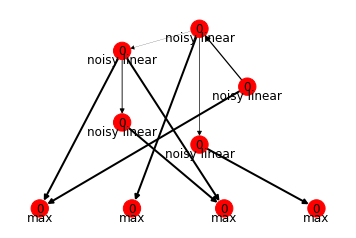

In [17]:
np.random.seed(4)
G = StructuredGraph(n_hidden=5, n_observations=4, structural_equation_generator=lin_hidden_max_obs_generator)
G.draw(show_values=True, show_eq=True)

We can then generate values according to those equations :

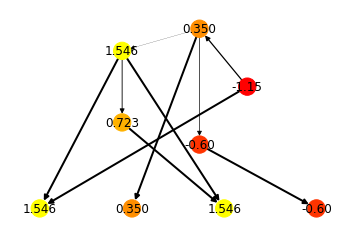

In [18]:
G.generate()
G.draw(show_values=True)

One can have a detailed summary of the state of the graph by printing it :

In [19]:
print(G)

DirectedAcyclicGraph. 9 nodes. 10 edges. Intervened node :None
Nodes :
	 node 0 {'observation': 0, 'value': -1.1568162609191428, 'structeq': noisy linear}
	 node 1 {'observation': 0, 'value': 0.3509971530825316, 'structeq': noisy linear}
	 node 2 {'observation': 0, 'value': 1.5469793290157272, 'structeq': noisy linear}
	 node 3 {'observation': 0, 'value': 0.7233416087478579, 'structeq': noisy linear}
	 node 4 {'observation': 0, 'value': -0.606887283097402, 'structeq': noisy linear}
	 node 5 {'observation': 1, 'value': 1.5469793290157272, 'structeq': max}
	 node 6 {'observation': 1, 'value': 0.3509971530825316, 'structeq': max}
	 node 7 {'observation': 1, 'value': 1.5469793290157272, 'structeq': max}
	 node 8 {'observation': 1, 'value': -0.606887283097402, 'structeq': max}
Edges :
	 edge (0, 1, {'weight': 0.6186696890268814})
	 edge (0, 5, {'weight': 1})
	 edge (1, 2, {'weight': -0.08798692834027545})
	 edge (1, 4, {'weight': 0.33225314537233536})
	 edge (1, 6, {'weight': 1})
	 edge (2,

Those equations are stochastic, so generating several times will give different values for the nodes

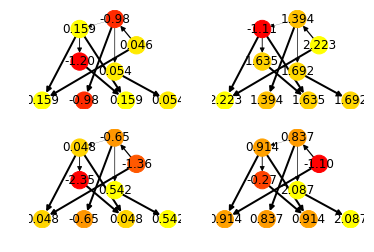

In [20]:
fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        G.generate()
        G.draw(show_values=True, ax=ax[i,j])

One can also set the numpy random seed in order to generate reproducible values :

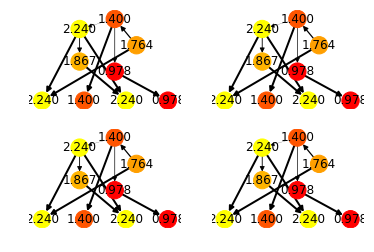

In [21]:
fig, ax = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        np.random.seed(0)
        G.generate()
        G.draw(show_values=True, ax=ax[i,j])

One can generate observations over **n** examples and get a 2D-array :

In [22]:
M = G.generate_observations(n_examples=10)
print("Array M of shape (n_examples, n_obervations)\n")
print(M)

Array M of shape (n_examples, n_obervations)

[[-0.10321885  0.95008842  0.4105985  -0.15135721]
 [ 0.14404357  1.45427351  0.44386323  0.76103773]
 [ 0.33367433  1.49407907  0.3130677  -0.20515826]
 [-0.74216502 -0.3463814   2.26975462  0.8644362 ]
 [ 1.53277921  0.04575852  1.53277921 -0.18718385]
 [ 0.15494743  0.37816252 -0.34791215 -0.88778575]
 [ 0.15634897  1.23029068 -0.30230275  1.20237985]
 [ 1.9507754  -1.42001794  1.9507754  -1.70627019]
 [-0.4380743  -1.25279536 -0.21274028  0.77749036]
 [-0.89546656  0.3869025  -0.02818223 -0.51080514]]


## Details about the graph

Graph generation : The skeleton of the graph is generated in two folds:
- The dag over the hidden nodes is generated using a directed acyclic graph (dag) generator (see the **dag_generator.py** file). One can easily write its own dag generator. The default is a variant of **growing network graphs**.
- The observation nodes are added to that graph using an observation subgraph generator (see the **obs_subgraph_generator.py** file). One can easily write its own observation subgraph generator. The default is a random graph where we enforce that each obervation has at least one parent.

## Interventions

One can intervene on one of the hidden nodes, and generate data accordingly. The graph will be truncated, and the value of the intervened node set to a specific value.

Let us intervene on the node 1 and set the corresponding structural equation equal to Constante zero. In a first time the attribute *value* of the node is not changed, but the graph is truncated.

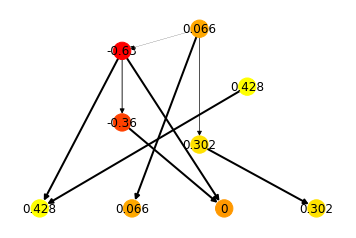

In [26]:
G.start_intervention(node=1, value=0)
G.draw(show_values=True)

One can then generate data under this intervention :

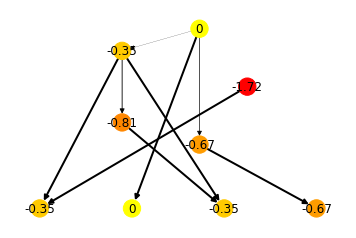

In [27]:
G.generate()
G.draw(show_values=True)

And come back to the original graph :

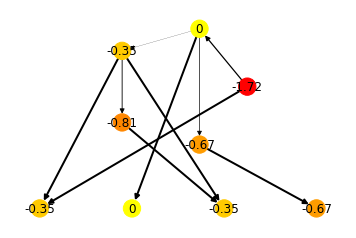

In [28]:
G.end_intervention()
G.draw(show_values=True)